# Chapter 3 - Linear regression: the basics

In [1]:
%pylab inline

import pandas as pd
import proplot as plot
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

Populating the interactive namespace from numpy and matplotlib


In [2]:
kidiq_df = pd.read_csv("../data/kidiq.tsv.gz", sep="\t")
kidiq_df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


The data represents cognitive test-scores of three- and four-year-old children given characteristics of their mothers, using data from a survey of adult American women and their children.

# Figure 3.1

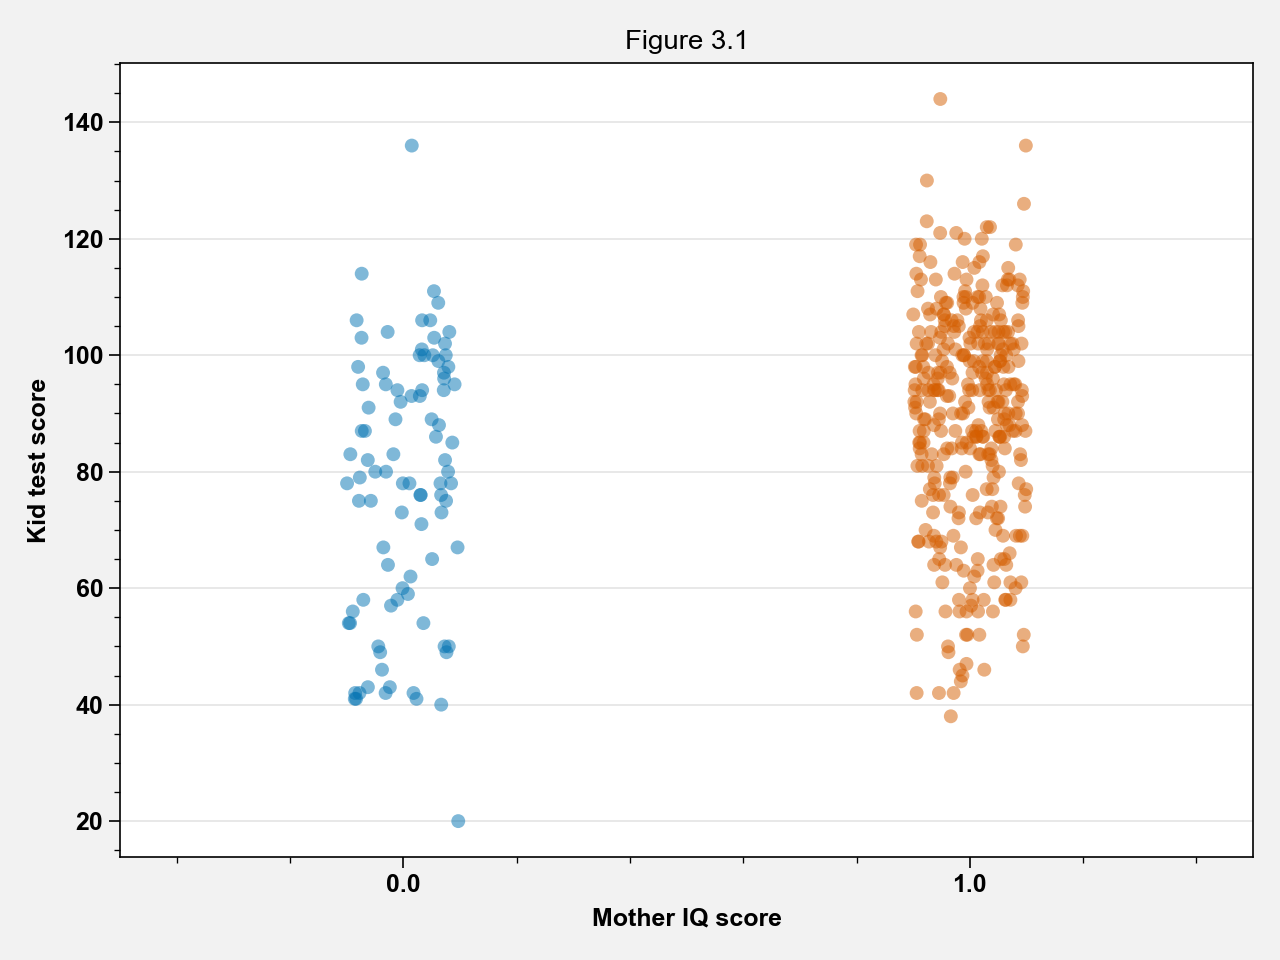

In [3]:
fig, ax = plt.subplots()
sns.stripplot(x="mom_hs", y="kid_score", data=kidiq_df, ax=ax, alpha=0.5)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Kid test score")
ax.set_title("Figure 3.1")
fig.tight_layout()

# One predictor

## Binary predictor

In [4]:
model = sm.OLS(kidiq_df["kid_score"], sm.add_constant(kidiq_df[["mom_hs"]]))
model = smf.ols(formula="""kid_score ~ mom_hs + 1""", data=kidiq_df)
results_hs = model.fit()
print(results_hs.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           5.96e-07
Time:                        16:23:55   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.5484      2.059     37.670      0.0

Thus,

$$\mathrm{kid\_score} = 78 + 12 . \mathrm{mom\_hs} + \mathrm{error}$$.

This model summarized the difference in average test scores between childrens of methoers who completed high school against those who did not.

\begin{align*}
78 &= \text{Average predicted score for children whose mothers did not complete high scool}\\
78 + 12 &= \text{Average predicted score for children whoses mothers did compelte high school}
\end{align*}


Thus, children whose mothers have completed high school score 12 points higher on average than children of methoers who haven't.


## Continuous predictor

In [5]:
model = smf.ols(formula="""kid_score ~ mom_iq + 1""", data=kidiq_df)
results_iq = model.fit()
print(results_iq.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.66e-23
Time:                        16:23:55   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7998      5.917      4.360      0.0

$$\mathrm{kid\_score} = 26 + 0.6 . \mathrm{mom\_hs} + \mathrm{error}$$.




In [6]:
results_iq_hs = smf.ols(
    formula="""kid_score ~ mom_iq + mom_hs + 1""", data=kidiq_df
).fit()
print(results_iq_hs.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.79e-23
Time:                        16:23:55   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7315      5.875      4.380      0.0

$$\mathrm{kid\_score} = 26 + 6.\mathrm{mom\_hs} + 0.6.\mathrm{mom\_iq}$$

Interpretation:

- Intercept (26): If a child had a mother who did not complete high school and an IQ of 0, then we would predict this child's test score to be 26.

- Coeff of mom_hs (6): If the mothers had same IQ, then a child whose mother went to high school will have 6 additional points as compared to the child whose mother did not go to high school.

- Coeff of mom_iq (0.6): Comparing children with same value of mom_hs, if mother IQ differs by 1 then children are expected to have a difference of 0.6 points.

# Interaction

In [7]:
results_iq_hs_interaction = smf.ols(
    formula="""kid_score ~ mom_hs + mom_iq + mom_hs:mom_iq""", data=kidiq_df
).fit()
print(results_iq_hs_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           3.07e-24
Time:                        16:23:55   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.4820     13.758     -0.835

## Interpretation 

$$\mathrm{kid\_score} = -11 + 51.2.\mathrm{mom\_hs} + 1.1.\mathrm{mom\_iq} - 0.5 \mathrm{mom\_hs:mom\_iq}$$


- Intercept (-12_: Predicted score for children whose mothers did not finish high school and have an IQ of 0. This is impossible scenario.

- Coeff of mom_hs: Difference of predicted kids's score with mothers whose high school status is the same = mothers did not complete high school and had an IQ of 0 and those whose mothers did complete high school but had an IQ of 0

- Coeff of mom_iq: Difference of predicted kids' score with  mothers who did not complete high school but whose mothers had an IQ difference of 1.

- Coeff of mom_hs:mom_iq: Difference in slope for mom_iq comparing children with mothers who did and did not complete 

It is also possible to see the interpretation of the interaction term by breaking it down into two categories: children with mom_hs = 1 and children with mom_hs = 0:

- mom_hs = 0:
    \begin{align*}\mathrm{kid\_score} &= -11 + 51.2(0) + 1.1.\mathrm{mom\_iq}\\
    &= -11 + 1.1.\mathrm{mom\_iq}
    \end{align*}

- mom_hs = 1:
    \begin{align*}\mathrm{kid\_score} &= -11 + 51.2(1) + 1.1.\mathrm{mom\_iq} - 0.5.1.\mathrm{mom\_iq}\\
    &= 40 + 0.6.\mathrm{mom\_iq}
    \end{align*}

    

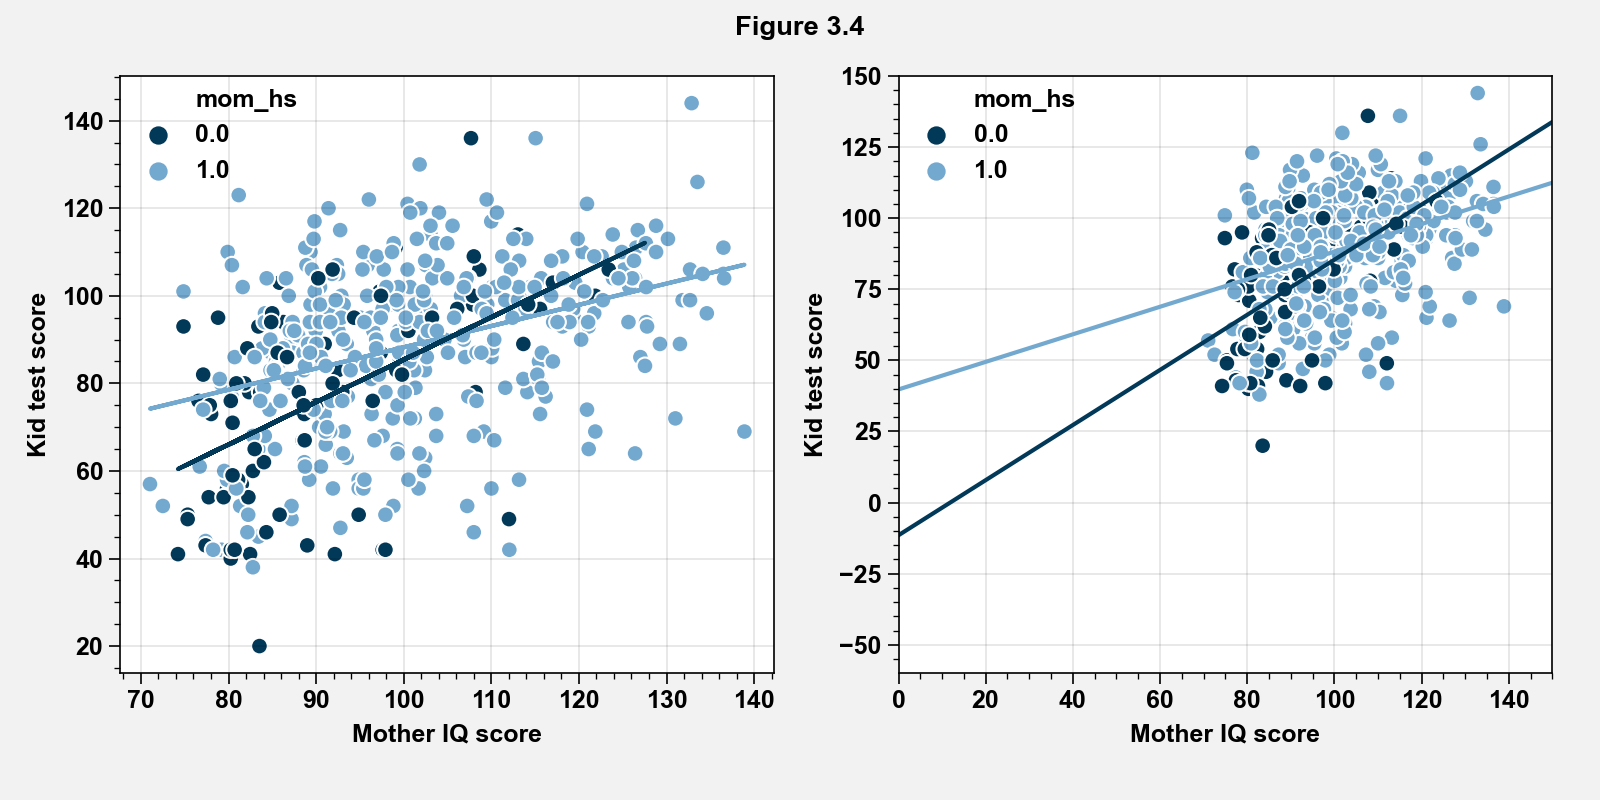

In [8]:
kidiq_hs1 = kidiq_df.loc[kidiq_df.mom_hs == 1]
kidiq_hs0 = kidiq_df.loc[kidiq_df.mom_hs == 0]

results_iq_hs_interaction = smf.ols(
    formula="""kid_score ~ mom_hs + mom_iq + mom_hs:mom_iq""", data=kidiq_df
).fit()


line_hs1 = (
    results_iq_hs_interaction.params[0]
    + results_iq_hs_interaction.params[1] * kidiq_hs1["mom_hs"]
    + results_iq_hs_interaction.params[2] * kidiq_hs1["mom_iq"]
    + results_iq_hs_interaction.params[3] * kidiq_hs1["mom_hs"] * kidiq_hs1["mom_iq"]
)
line_hs0 = (
    results_iq_hs_interaction.params[0]
    + results_iq_hs_interaction.params[1] * kidiq_hs0["mom_hs"]
    + results_iq_hs_interaction.params[2] * kidiq_hs0["mom_iq"]
    + results_iq_hs_interaction.params[3] * kidiq_hs0["mom_hs"] * kidiq_hs0["mom_iq"]
)


fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(121)
palette = {0: "#023858", 1: "#74a9cf"}
sns.scatterplot(x="mom_iq", y="kid_score", hue="mom_hs", data=kidiq_df, palette=palette)
ax.plot(kidiq_hs1["mom_iq"], line_hs1, color=palette[1])
ax.plot(kidiq_hs0["mom_iq"], line_hs0, color=palette[0])

ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Kid test score")
ax.legend(frameon=False)

ax = plt.subplot(122)
palette = {0: "#023858", 1: "#74a9cf"}
sns.scatterplot(x="mom_iq", y="kid_score", hue="mom_hs", data=kidiq_df, palette=palette)

ax.set_xlim(0, 150)
ax.set_ylim(-60, 150)

m, b = np.polyfit(kidiq_hs1["mom_iq"], line_hs1, 1)
xpoints = np.linspace(0, 150, 1000)
ax.plot(xpoints, xpoints * m + b, color=palette[1])

m, b = np.polyfit(kidiq_hs0["mom_iq"], line_hs0, 1)
ax.plot(xpoints, xpoints * m + b, color=palette[0])

# ax.plot(kidiq_hs1["mom_iq"], line_hs1, color=palette[1])
# ax.plot(kidiq_hs0["mom_iq"], line_hs0, color=palette[0])


ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Kid test score")
ax.legend(frameon=False)


fig.suptitle("Figure 3.4")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Fitting and summarizing regressions

In [9]:
results_hs_iq = smf.ols(formula="""kid_score ~ mom_hs + mom_iq""", data=kidiq_df).fit()
print(results_hs_iq.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.79e-23
Time:                        16:23:55   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7315      5.875      4.380      0.0

# Displaying a regression line as a function of one input variable

In [10]:
results_iq = smf.ols(formula="""kid_score ~ mom_iq""", data=kidiq_df).fit()
print(results_iq.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.66e-23
Time:                        16:23:56   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7998      5.917      4.360      0.0

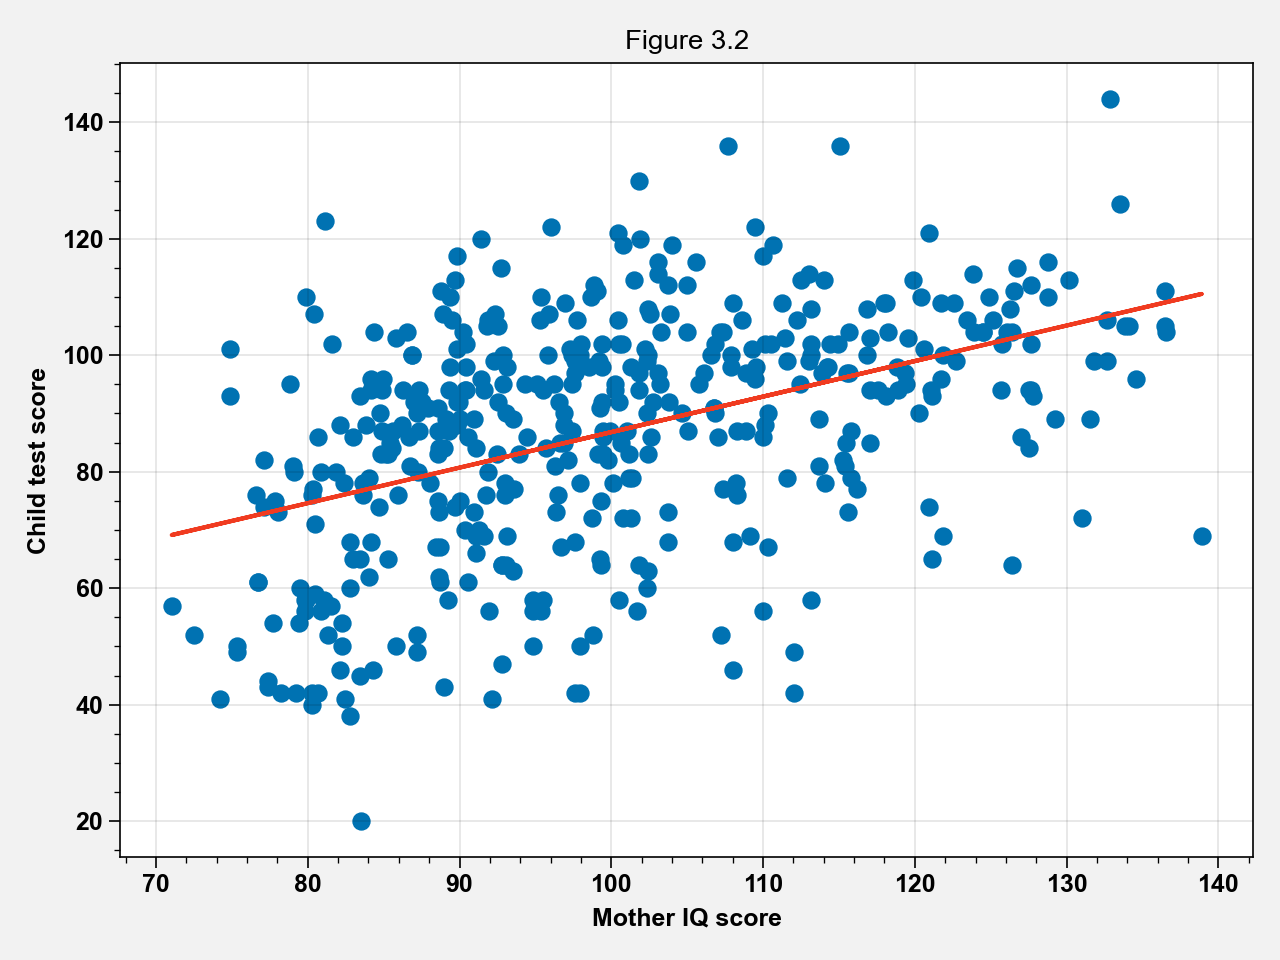

In [12]:
fig, ax = plt.subplots()
ax.scatter(kidiq_df["mom_iq"], kidiq_df["kid_score"])
line = results_iq.params[0] + results_iq.params[1] * kidiq_df["mom_iq"]
ax.plot(kidiq_df["mom_iq"], line, color="#f03b20")
ax.set_title("Figure 3.2")
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score")
fig.tight_layout()

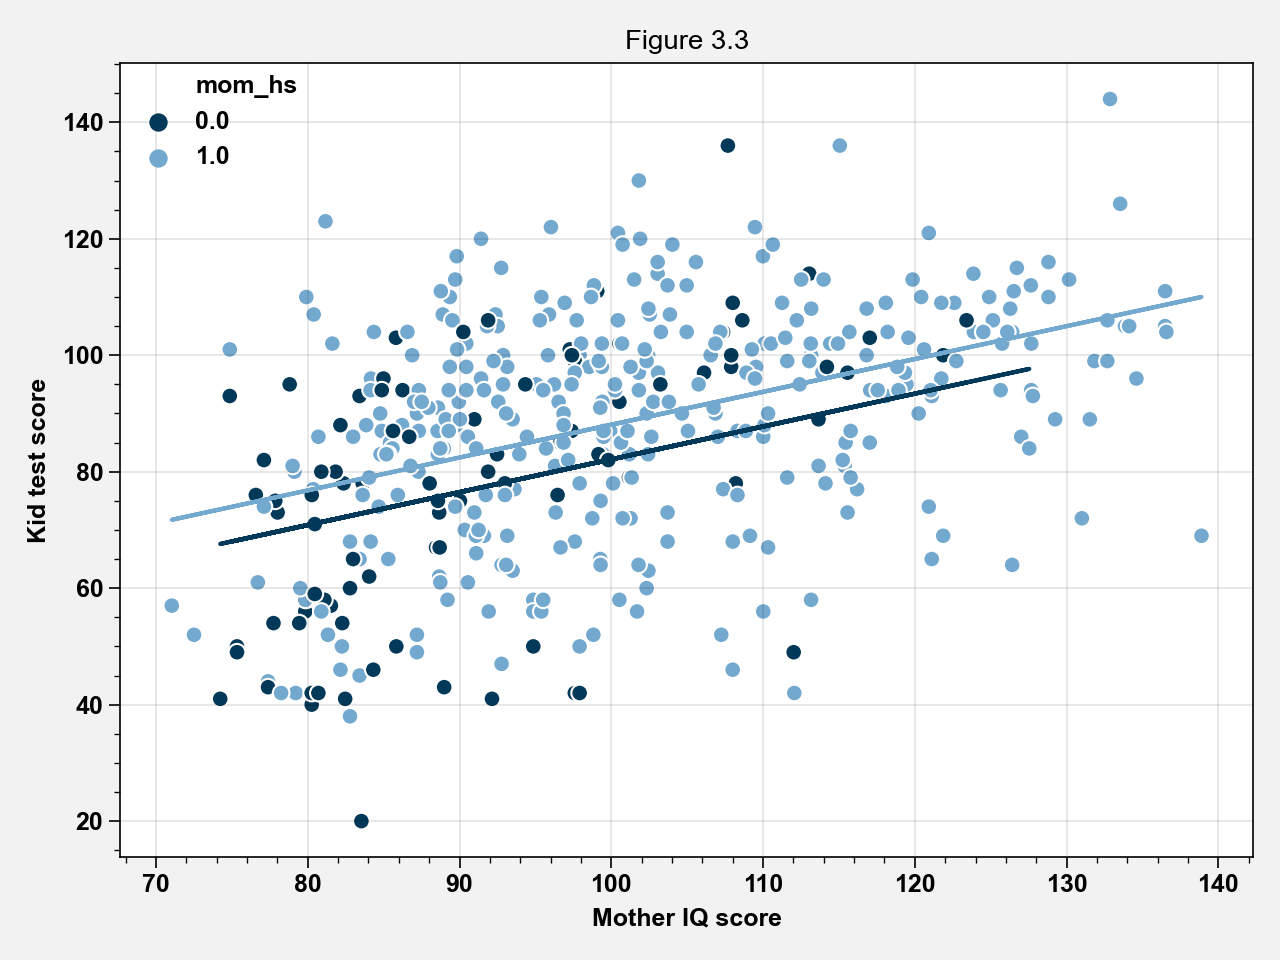

In [13]:
kidiq_hs1 = kidiq_df.loc[kidiq_df.mom_hs == 1]
kidiq_hs0 = kidiq_df.loc[kidiq_df.mom_hs == 0]

results_iq_hs1 = smf.ols(formula="""kid_score ~ mom_iq + 1""", data=kidiq_hs1).fit()
results_iq_hs0 = smf.ols(formula="""kid_score ~ mom_iq + 1""", data=kidiq_hs0).fit()
results_iq_hs = smf.ols(
    formula="""kid_score ~ mom_iq + mom_hs + 1""", data=kidiq_df
).fit()


line_hs1 = results_iq_hs1.params[0] + results_iq_hs1.params[1] * kidiq_hs1["mom_iq"]
line_hs0 = results_iq_hs0.params[0] + results_iq_hs0.params[1] * kidiq_hs0["mom_iq"]
line_hs1 = (
    results_iq_hs.params[0]
    + results_iq_hs.params[1] * kidiq_hs1["mom_iq"]
    + results_iq_hs.params[2] * kidiq_hs1["mom_hs"]
)
line_hs0 = (
    results_iq_hs.params[0]
    + results_iq_hs.params[1] * kidiq_hs0["mom_iq"]
    + results_iq_hs.params[2] * kidiq_hs0["mom_hs"]
)

fig, ax = plt.subplots()
palette = {0: "#023858", 1: "#74a9cf"}
sns.scatterplot(x="mom_iq", y="kid_score", hue="mom_hs", data=kidiq_df, palette=palette)
ax.plot(kidiq_hs1["mom_iq"], line_hs1, color=palette[1])
ax.plot(kidiq_hs0["mom_iq"], line_hs0, color=palette[0])

ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Kid test score")
ax.legend(frameon=False)
ax.set_title("Figure 3.3")
fig.tight_layout()

## TODO:  Displaying uncertainity in the fitted regression

## Plotting residuals

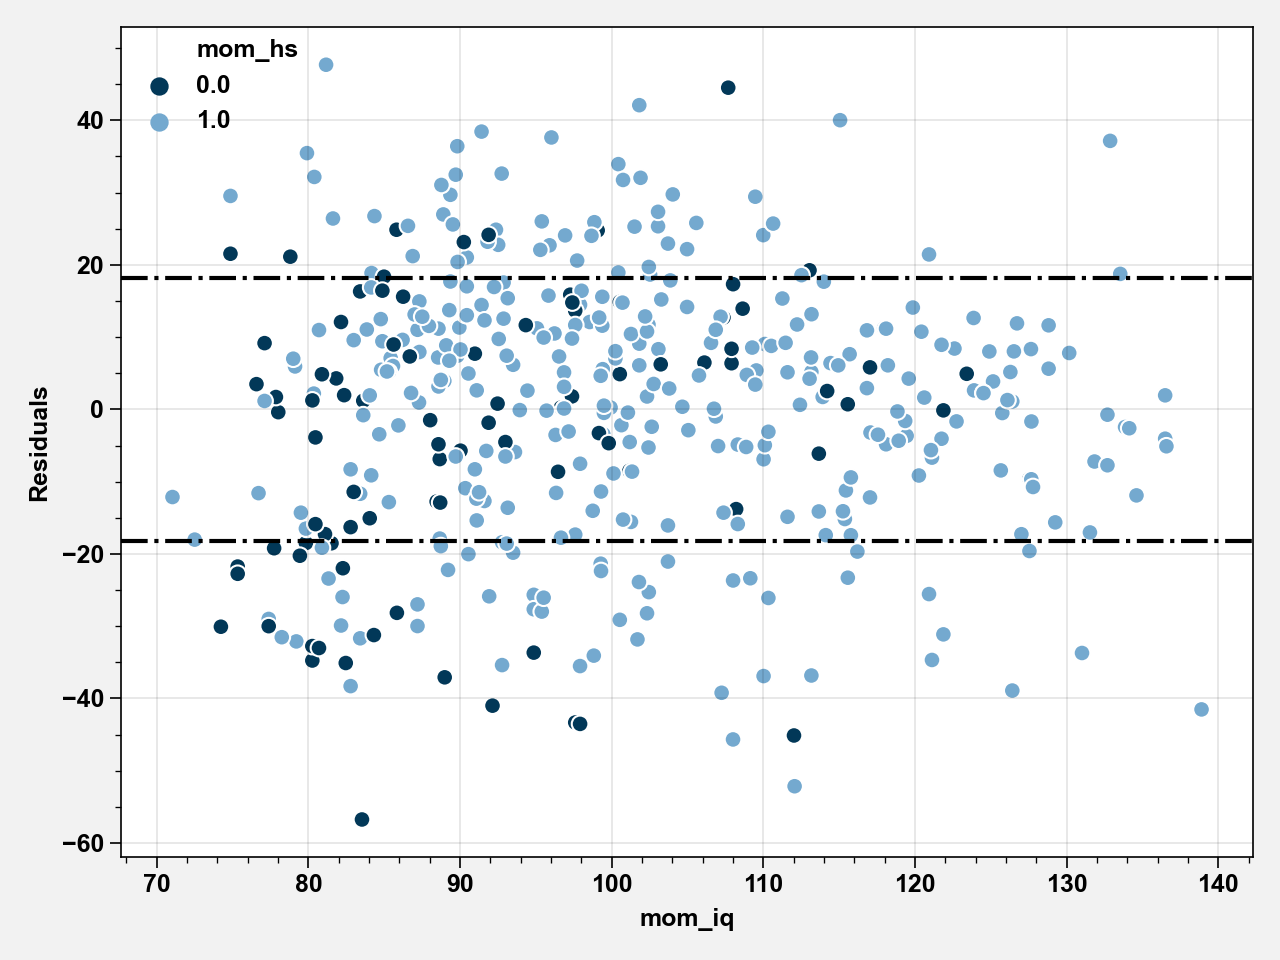

In [14]:
results_iq = smf.ols(formula="""kid_score ~ mom_iq""", data=kidiq_df).fit()
kidiq_df["Residuals"] = results_iq.resid
sd = kidiq_df["Residuals"].std()
fig, ax = plt.subplots()
palette = {0: "#023858", 1: "#74a9cf"}
sns.scatterplot(x="mom_iq", y="Residuals", hue="mom_hs", data=kidiq_df, palette=palette)

ax.axhline(y=sd * 1, linestyle="-.", color="black")
ax.axhline(y=sd * -1, linestyle="-.", color="black")
ax.legend(frameon=False)
fig.tight_layout()